# <font color = Crimson size = 6> <b>Разведочный анализ / EDA (exploratory data analysis)</b> </font>

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.robust as robust

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


| Название признака | Описание |
| ---: | :--- |
| id | идентификационный номер дома |
| date | дата продажи |
| price | стоимость |
| bedrooms | кол-во спален |
| bathrooms | кол-во ванных комнат (0.25 - комната с туалетом, 0.5 - комната с туалетом и раковиной) |
| sqft_living | жилая площадь |
| sqft_lot | площадь прилегающего участка |
| floors | кол-во этажей |
| waterfront | вид на набережную |
| view | оценка внешнего вида |
| condition | оценка состояния |
| grade | оценка качества строительства и дизайна здания |
| sqft_above | площадь наземной части |
| sqft_basement | площадь подземной части |
| yr_built | год строительства дома |
| yr_renovated | год последнего ремонта или реконструкции |
| zipcode | почтовый индекс |
| lat | широта |
| long | долгота |

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df['date']= pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

In [6]:
df['price'] = df['price']/1_000

## <font color = DarkGreen size = 5> <b>Генеральная и выборочная совокупности</b> </font>

<u>**Генеральная совокупность**</u> — это множество, которое содержит данные обо всех объектах, соответствующих определенным характеристикам.

<u>**Выборка**</u> — это случайным образом выбранная часть генеральной совокупности.

<u>**Репрезентативная выборка**</u> — часть генеральной совокупности, являющаяся моделью генеральной совокупности и отражющая свойства генеральной совокупности.

## <font color = DarkGreen size = 5> <b>Точечные оценки параметров распределения</b> </font>

### <font color = MediumBlue size = 5> <b>Частотные таблицы и гистограммы</b> </font>

#### <font color = SteelBlue size = 4> <b>Частотная таблица</b> </font>

<u>**Частотная таблица**</u> переменной делит диапазон переменной на равноотстоящие сегменты и сообщает о том, сколько значений попадает в каждый сегмент.

In [7]:
pd.cut(df['price'], 20).value_counts()

price
(67.375, 456.25]     11041
(456.25, 837.5]       7981
(837.5, 1218.75]      1638
(1218.75, 1600.0]      527
(1600.0, 1981.25]      215
(1981.25, 2362.5]       83
(2362.5, 2743.75]       57
(2743.75, 3125.0]       33
(3125.0, 3506.25]       16
(3506.25, 3887.5]       10
(5031.25, 5412.5]        3
(3887.5, 4268.75]        2
(4268.75, 4650.0]        2
(4650.0, 5031.25]        1
(5412.5, 5793.75]        1
(6556.25, 6937.5]        1
(6937.5, 7318.75]        1
(7318.75, 7700.0]        1
(5793.75, 6175.0]        0
(6175.0, 6556.25]        0
Name: count, dtype: int64

#### <font color = SteelBlue size = 4> <b>Гистограмма частот / Распределение частот</b> </font>

<u>**Гистограмма частот**</u> представляет в графической форме число случаев появления каждого значения измеренной характеристики (признака) в каждом выбранном диапазоне ее значений. Рапредление частот позволяет быстро сделать выводы о степени подробности результатов измерений.

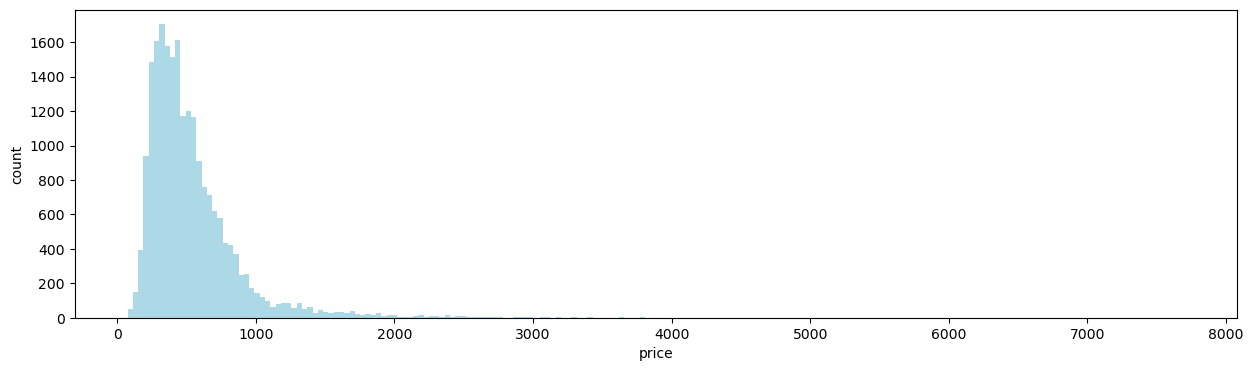

In [8]:
plt.figure(figsize=(15,4))
plt.hist(df['price'], bins=200, color = 'lightblue')
plt.xlabel('price')
plt.ylabel('count');

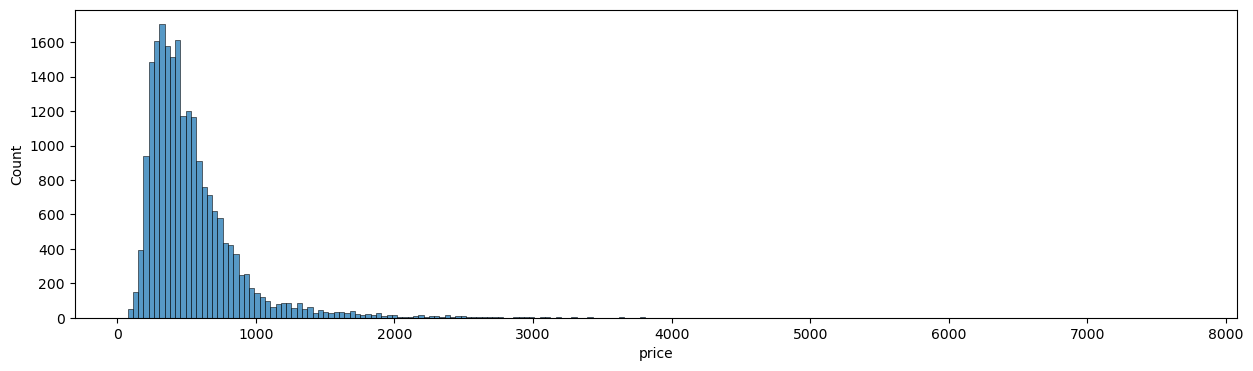

In [9]:
plt.figure(figsize=(15, 4))
sns.histplot(data=df, x='price', bins=200); # ,binwidth=50

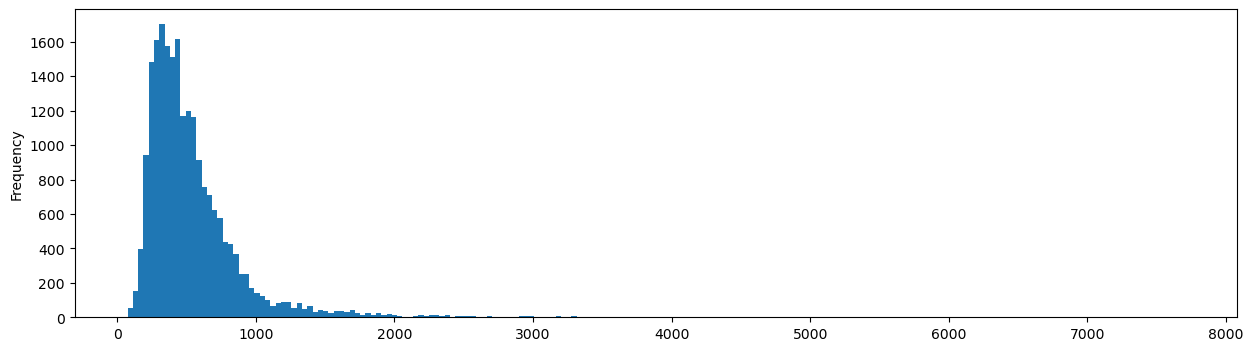

In [10]:
ax = (df['price']).plot.hist(figsize=(15, 4), bins=200)

С гистограммой связан **график плотности**, который показывает распределение значений данных в форме сплошной линии.\
График плотности можно рассматривать как сглаженную гистограмму.

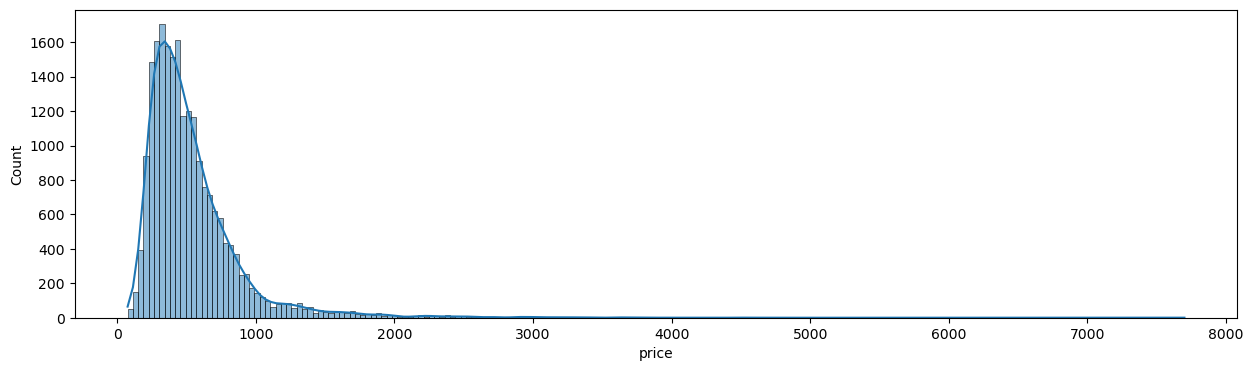

In [11]:
plt.figure(figsize=(15, 4))
sns.histplot(data=df, x='price', bins=200, kde=True);

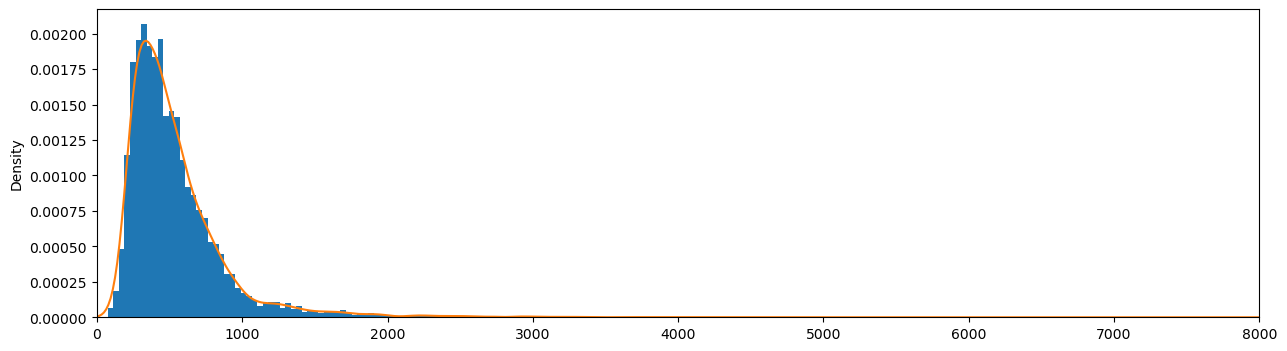

In [12]:
ax = df['price'].plot.hist(figsize=(15, 4), density=True, xlim=[0,8000], bins=200)
df['price'].plot.density(ax=ax);

Ключевое отличие от гистограммы состоит в шкале оси $y$ график плотности соответствует отображению гистограммы как доли, а не количества.\
Общая площадь под кривой плотности равна $1$, и вместо количества в диапазоне вычисляется площадь под кривой между любыми двумя точками на оси $x$, которые соответствуют доли распределения, лежащей между этими двумя точками.

### <font color = MediumBlue size = 5> <b>Меры центральной тенденции</b> </font>

#### <font color = SteelBlue size = 4> <b>Мода</b> </font>

<u>**Мода**</u> – наиболее часто встречающееся в выборке значение.

Мода $M_0$ дискретного вариационного ряда – это варианта с максимальной частотой.

Для интервального вариационного ряда нужно найти <u>**модальный интервал**</u>, т.е. с максимальной частотой.

In [13]:
modes = stats.mode(df['price'])
modes

ModeResult(mode=350.0, count=172)

In [14]:
modes[0]

350.0

In [15]:
mode, cnt = modes
mode, cnt

(350.0, 172)

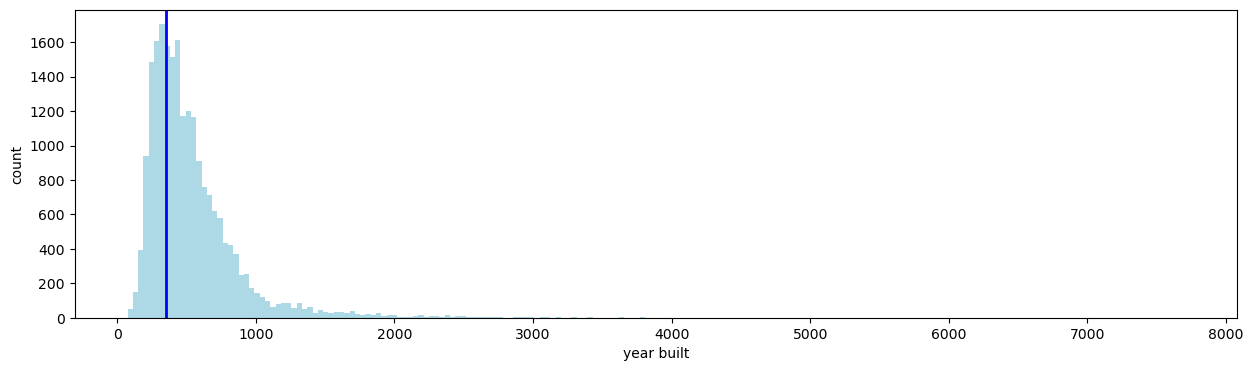

In [16]:
fig, ax = plt.subplots(figsize=(15, 4))

ax.hist(df['price'], bins=200, color = 'lightblue')
ax.axvline(x=mode, color='blue', lw=2)
ax.set_xlabel('year built')
ax.set_ylabel('count');

#### <font color = SteelBlue size = 4> <b>Медиана</b> </font>

<u>**Медиана**</u> $m_e$ вариационного ряда – это значение, которая делит его на две равные части (по количеству вариант).
>не важно, дискретного или интервального, генеральной совокупности или выборочной.

<br>

Для **дискретного** вариационного ряда:
- для нечетной выборки: $\displaystyle m_e = N_{\left[\frac{n+1}{2}\right]}$

- для четной выборки: 
$\displaystyle m_e = \frac{N_{\left[\frac{n}{2}\right]} + 
       N_{\left[\frac{n}{2}+1\right]}}{2}$

<br>

Для **интервального** вариационного ряда:

<u>**медианный интервал**</u> – это интервал, содержащий варианту (либо 2 варианты), которая делит вариационный ряд на две равные части. 

$\displaystyle m_e = x_0 + \frac{0.5n-n_{m-1}^{n}}{n_m}h$, где \
$n$ — объём статистической совокупности \
$x_0$ — нижняя граница медианного интервала \
$h$ — длина медианного интервала \
$n_m$ — частота медианного интервала \
$n_{m-1}^{n}$ — накопленная частота предыдущего интервала

In [17]:
me = np.median(df['price'])
me

450.0

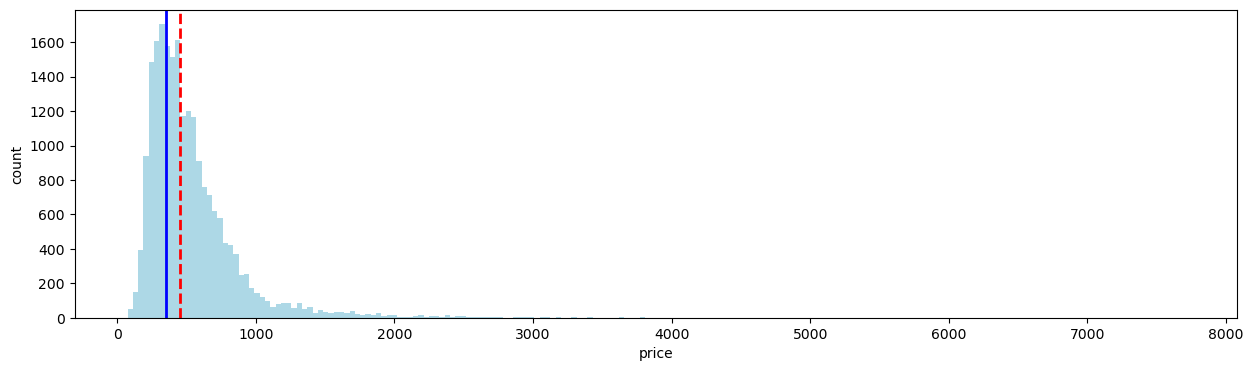

In [18]:
fig, ax = plt.subplots(figsize=(15, 4))

ax.hist(df['price'], bins=200, color = 'lightblue')
ax.axvline(x=mode, color='blue', lw=2)
plt.axvline(x=me, color='red', ls='--', lw=2)
ax.set_xlabel('price')
ax.set_ylabel('count');

In [19]:
df['price'].median()

450.0

#### <font color = SteelBlue size = 4> <b>Среднее значение</b> </font>

##### <font color = Gray size = 3> <b>Среднее арифметическое</b> </font>

<u>**Генеральная средняя**</u> – среднее арифметическое всех значений генеральной совокупности.

$\displaystyle \bar X = \frac{\sum_{i=1}^{N}{x_i}}{N}$

Если рассматривать обследуемый признак $X$ генеральной совокупности как случайную величину, то <u>**математическое ожидание**</u>
признака равно генеральной средней этого признака: $M(X) = \bar{X}$.

<u>**Выборочная средняя**</u> – сумма значений измеренного признака всех элементов выборки, делённая на количество элементов выборки объема $n$.

$\displaystyle \bar x = \frac{\sum_{i=1}^{n}{x_i}}{n}$

Выборочная средняя, найденная по данным одной выборки – это определенное число.\
Если же извлекать другие выборки того же объема из той же генеральной совокупности, то выборочная средняя будет изменяться от выборки к выборке.\
Таким образом, выборочную среднюю можно рассматривать как случайную величину, а следовательно, можно говорить о распределениях (теоретическом и эмпирическом) выборочной средней и о числовых характеристиках этого распределения (его называют выборочным), в частности о математическом ожидании и дисперсии **выборочного распределения**.

При увеличении объема выборки $n$ выборочная средняя стремится по вероятности к генеральной средней, а это и означает, что выборочная средняя есть состоятельная оценка генеральной средней.\
Из сказанного следует также, что если по нескольким выборкам достаточно большого объема из одной и той же генеральной совокупности будут найдены выборочные средние, то они будут приближенно равны между собой.\
В этом и состоит свойство **устойчивости выборочных средних**.

In [20]:
Mx = np.mean(df['price'])
Mx

540.0881417665294

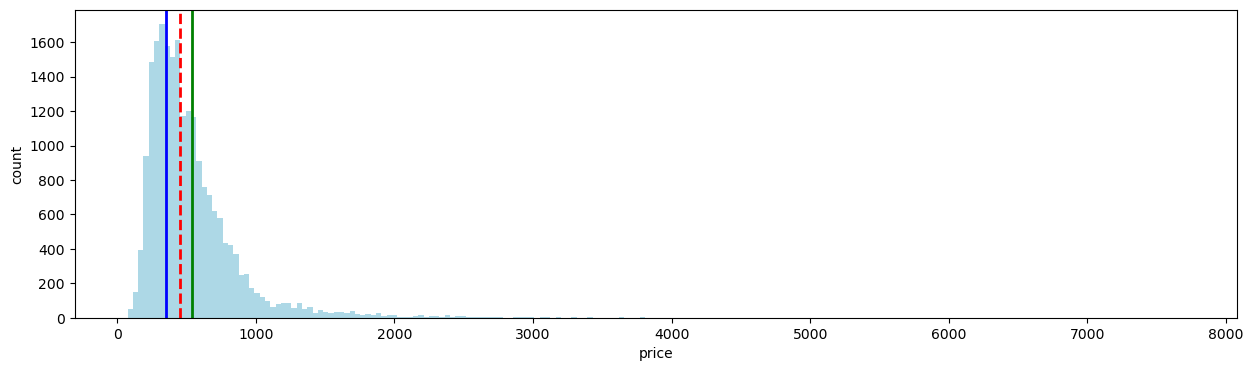

In [21]:
fig, ax = plt.subplots(figsize=(15, 4))

ax.hist(df['price'], bins=200, color = 'lightblue')
ax.axvline(x=mode, color='blue', lw=2)
plt.axvline(x=me, color='red', ls='--', lw=2)
ax.axvline(x=Mx, color='green', lw=2)
ax.set_xlabel('price')
ax.set_ylabel('count');

In [22]:
df['price'].mean()

540.0881417665294

##### <font color = Gray size = 3> <b>Среднее усеченное</b> </font>

Разновидностью среднего является <u>**среднее усеченное**</u>, которое вычисляется путем отбрасывания фиксированного числа сортированных значений с каждого конца последовательности и затем взятия среднего арифметического оставшихся значений.

Если представить сортированные значения как $x_1, x_2, \ldots, x_n$, где $x_1$ — это наименьшее значение и $x_n$ — наибольшее, то формула для вычисления усеченного среднего с пропуском $p$ самых малых и самых крупных значений будет следующей:\
$\bar{x} = \cfrac{\displaystyle\sum_{i=p+1}^{n-p}{x_i}}{n-2p}$

Усеченное среднее устраняет влияние предельных значений.\
Усеченные средние получили широкое распространение и во многих случаях являются предпочтительными вместо обычного среднего.

In [23]:
print(f"""
Выборочное среднее: {df['price'].mean()}
 Среднее усеченное: {stats.trim_mean(df['price'], 0.1)}
""")


Выборочное среднее: 540.0881417665294
 Среднее усеченное: 481.7040194899081



##### <font color = Gray size = 3> <b>Среднее взвешенное</b> </font>

**Средневзвешенное значение** вычисляется путем умножения каждого значения данных $x_i$ на свой вес $w_i$ и деления их суммы на сумму весов:\
$\bar{x}_w = \cfrac{\displaystyle \sum_{i=1}^{n}{w_i x_i}}{\displaystyle \sum_{i=1}^{n}{w_i}}$


Причины для использования средневзвешенного значения:

- Некоторые значения внутренне более переменчивы, чем другие, и сильно переменчивым наблюдениям придается более низкий вес.\
    Например, если мы берем среднее арифметическое данных, поступающих от многочисленных датчиков, и один из датчиков менее точен, тогда вес данных от этого датчика можно понизить.

- Собранные данные не одинаково представляют разные группы, которые мы заинтересованы измерить.\
    Например, в зависимости от того, каким образом проводится онлайновый эксперимент, у нас может не быть набора данных, который точно отражает все группы в пользовательской базе. Для того чтобы это исправить, можно придать более высокий вес значениям из тех групп, которые были представлены недостаточно.

In [24]:
df['date'].min(), df['date'].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In [25]:
df['weight'] = 1 / (np.floor((pd.to_datetime('2015-06-01') - df['date']).dt.days / 30.4375) + 1)

In [26]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,weight
20851,8956200070,2014-09-05,447.5,4,2.50,2425,9017,2.0,0,0,3,9,2425,0,2013,0,98001,47.3003,-122.263,2725,7019,0.111111
13487,7340601063,2014-09-03,295.5,3,1.75,1590,41550,1.5,0,0,3,6,1290,300,1933,1989,98168,47.4817,-122.280,2990,6464,0.111111
2707,4027701294,2015-01-29,485.0,3,2.75,2650,12350,1.0,0,0,4,7,1470,1180,1975,0,98028,47.7669,-122.268,1950,14075,0.200000
17751,8651430210,2015-03-21,217.0,3,1.00,870,5200,1.0,0,0,5,6,870,0,1969,0,98042,47.3701,-122.078,1020,5200,0.333333
9592,3629970620,2014-10-03,476.1,4,2.50,1850,1836,2.0,0,0,3,7,1600,250,2005,0,98029,47.5529,-121.996,1770,2236,0.125000


In [27]:
print(f"""
Математическое ожидание: {df['price'].mean()}
     Среднее взвешенное: {np.average(df['price'], weights=df['weight'])}
""")


Математическое ожидание: 540.0881417665294
     Среднее взвешенное: 543.9720180052584



### <font color = MediumBlue size = 5> <b>Меры изменчивости / показатели вариации</b> </font>

#### <font color = SteelBlue size = 4> <b>Размах вариации (range)</b> </font>

<u>**Размах вариации**</u> — абсолюная разность между максимальным и минимальным значениями измеренного признака.

$R = X_{max} - X_{min}$

In [28]:
R = np.max(df['price']) - np.min(df['price'])
R

7625.0

#### <font color = SteelBlue size = 4> <b>Дисперсия (variance)</b> </font>

<u>**Дисперсия**</u> — средний квадрат отклонений индивидуальных значений признака от их средней величины.

Характеризует степень рассеянности значений случайной величины относительно ее математического ожидания.

##### <font color = Gray size = 3> <b>Генеральная дисперсия</b> </font>

<u>**Генеральная дисперсия**</u> $\sigma^2$ — среднее арифметическое квадратов отклонений значений признака генеральной совокупности от их среднего значения $\bar{X}$.

Если все значения $x_1,x_2,\ldots,x_N$ признака генеральной совокупности объема $N$ различны: \
$\displaystyle \sigma^2 = \frac{\displaystyle \sum_{i=1}^{N}{(x_i-\bar{X})^2}}{N}$

Если значения признака $x_1,x_2,\ldots,x_k$ имеют соответственно частоты $N_1,N_2,\ldots,N_k$ причем
$\displaystyle \sum_{i=1}^{k}{N_k}=N$: \
$\displaystyle \sigma^2 = \frac{\displaystyle \sum_{i=1}^{k}{N_i(x_i-\bar{X})^2}}{N}$

.

##### <font color = Gray size = 3> <b>Выборочная дисперсия</b> </font>

<u>**Выборочная дисперсия**</u> $D$ — среднее арифметическое квадратов отклонения наблюдаемых значений признака от среднего выборочного $\bar{x}$.

**Смещенная дисперсия** (для больших выборок)

Если все значения $x_1,x_2,\ldots,x_n$ признака выборки объема $n$ различны: \
$\displaystyle D = \frac{\displaystyle \sum_{i=1}^{n}{(x_i-\bar{x})^2}}{n}$

Если значения признака $x_1,x_2,\ldots,x_k$ имеют соответственно частоты $n_1,n_2,\ldots,n_k$ причем
$\displaystyle \sum_{i=1}^{k}{n_k}=n$: \
$\displaystyle D = \frac{\displaystyle \sum_{i=1}^{k}{n_i(x_i-\bar{x})^2}}{n}$

**Несмещенная дисперсия** (для малых выборок $n<100$)

Если все значения $x_1,x_2,\ldots,x_n$ признака выборки объема $n$ различны:\
$\displaystyle S^2 = \frac{\displaystyle \sum_{i=1}^{n}{(x_i-\bar{x})^2}}{n-1}$

Если значения признака $x_1,x_2,\ldots,x_k$ имеют соответственно частоты $n_1,n_2,\ldots,n_k$ причем
$\displaystyle \sum_{i=1}^{k}{n_k}=n$: \
$\displaystyle S^2 = \frac{\displaystyle \sum_{i=1}^{k}{n_i(x_i-\bar{x})^2}}{n-1}$

В качестве оценки генеральной дисперсии принимают несмещенную дисперсию.

Дисперсия меняет свое значение от выборки к выборке.\
Дисперсия рассчитывается от средней величины, а она в свою очередь, тоже рассчитывается по выборке, то есть является ошибочной.

Если бы мы знали истинную среднюю величину (по генеральной совокупности), то ошибка дисперсии была бы связана только с нерепрезентативностью, то есть с тем, что данные в выборке оказались бы ближе или дальше от средней, чем в целом по генеральной совокупности.\
При этом при многократном повторении данные стремились бы к своему реальному расположению относительно средней.

Выборочный показатель, который при многократном повторении выборки стремится к своему теоретическому значению, называется **несмещенной оценкой**.\
Оценкой, потому что мы не знаем реальное значение показателя (по генеральной совокупности), и с помощью выборочного наблюдения пытаемся его оценить.\
**Оценка показателя** – это есть его характеристика, рассчитанная по выборке.

**Выборочная средняя** – это несмещенная оценка математического ожидания, так как средняя из выборочных средних стремится к своему теоретическому значению по генеральной совокупности.\
Она расположена в центре выборки.\
Раз выборочная средняя находится в центре выборки, то из этого следует, что сумма квадратов расстояний от каждого значения выборки до выборочной средней всегда меньше, чем до любой другой точки, в том числе и до генеральной средней.\
А раз так, то дисперсия в каждой выборке будет занижена.\
Средняя из заниженных дисперсий также даст заниженное значение.\
То есть при многократном повторении эксперимента выборочная дисперсия не будет стремиться к своему истинному значению (как выборочная средняя), а будет смещена относительно истинного значения по генеральной совокупности.

<img src="./img/var-5-01.png" width="600"/>

In [29]:
# смещенная дисперсия
d = np.var(df['price'], ddof=0)
print(f'D = {d:_.2f}')

# несмещенная дисперсия
d = np.var(df['price'], ddof=1)
print(f'D = {d:_.2f}\n')

D = 134_776.14
D = 134_782.38



In [30]:
# смещенная дисперсия
d = np.var(df['price'].sample(100, random_state=14), ddof=0)
print(f'D = {d:_.2f}')

# несмещенная дисперсия
d = np.var(df['price'].sample(100, random_state=14), ddof=1)
print(f'D = {d:_.2f}\n')

D = 129_058.67
D = 130_362.29



#### <font color = SteelBlue size = 4> <b>Среднее квадратическое отклонение / стандартное отклонение (standard deviation)</b> </font>

<u>**Среднее квадратическое отклонение**</u> — обобщающая статистическая характеристика вариации значений признака.

Показывает, насколько далеко наблюдения могут быть "разбросаны" относительно их среднего значения.\
Если эта мера мала, то кривая распределения имеет узкую, сжатую форму — результаты измерений обладают высокой степенью схожести.\
Если мера велика, то кривая рапределения имеет широкий, растянутый вид — велика степень различия оценок.

<br>

<u>**Генеральное среднее квадратическое (стандартое) отклонение**</u> — квадратный корень из генеральной дисперсии:\
$\displaystyle \sigma = \sqrt{\sigma^2}$

<br>

<u>**Выборочное среднее квадратическое (стандартое) отклонение**</u> — квадратный корень из выборочной дисперсии:\
$\displaystyle S = \sqrt{S^2}$

In [31]:
# смещенное стандартное отклонение
sig = np.std(df['price'], ddof=0)
print(f'SD = {sig:.4f}')

# несмещенное стандартное отклонение
s = np.std(df['price'], ddof=1)
print(f'SD = {s:.4f}')

SD = 367.1187
SD = 367.1272


#### <font color = SteelBlue size = 4> <b>Медианное абсолютное отклонение от медианы</b> </font>

Робастной оценкой вариабельности является <u>**медианное абсолютное отклонение от медианы**</u> (median absolute deviation, MAD) =\
медиана($|x_1 - m_e|, |x_2 - m_e|, \ldots, |x_n - m_e|$), где $m_e$ - медиана.

Как и в случае с медианой, медианное абсолютное отклонение от медианы не находится под влиянием предельных значений.

> Под робастностью в статистике понимают нечувствительность к различным отклонениям и неоднородностям в выборке, связанным с теми или иными, в общем случае неизвестными, причинами.

In [32]:
df['price'].std(), robust.scale.mad(df['price'])

(367.12719648270047, 222.39033277584028)

#### <font color = SteelBlue size = 4> <b>Коэффициент вариации</b> </font>

<u>**Коэффициент вариации**</u> – это отношение стандартного отклонения к средней, выраженное в процентах:\
$\displaystyle V = \frac{\sigma}{\bar{x}}\cdot100\%$

В статистике существует следующий эмпирический ориентир:

-  если показатель вариации составляет примерно 30% и меньше, то статистическая совокупность считается **однородной**. Это означает, что большинство вариант находится недалеко от средней, и найденное значение $\bar{x}$ хорошо характеризует центральную тенденцию совокупности.

- если показатель вариации составляет существенно больше 30%, то совокупность **неоднородна**, то есть, значительное количество вариант находятся далеко от $\bar{x}$, и выборочная средняя плохо характеризует типичную варианту. В таких случаях целесообразно рассмотреть **квартили, децили,** а иногда и **перцентили**, которые делят вариационный ряд на части, и для каждого участка рассчитать свои показатели.

In [33]:
SD = np.std(df['price'], ddof=0)
Mx = np.mean(df['price'])
print(f'V = {SD/Mx*100:.1f}')

V = 68.0


#### <font color = SteelBlue size = 4> <b>Асимметрия</b> </font>

<u>**Асимметрия**</u> – мера отклонения эмпирического распределения частот от симметричного распределения относительно максимальной ординаты.

Количественная мера скошенности симметричного распределения, т.е. некоторой плавности или крутости боковой части кривой распределения.

**Формула Пирсона**: $\displaystyle A_s = \frac{\bar{X}-M_0}{\sigma}$, где $M_0$ - мода

В левостороннем случае коэффициент асимметрии отрицателен $\bar{X}<M_0$, а в правостороннем – положителен $\bar{X}>M_0$.\
Чем больше $A_s$ по модулю – тем сильнее скос распределения.

> Недостаток формулы Пирсона состоит в том, что она описывает лишь центральную часть распределения и практически не учитывает «периферию».

<br>

Для **выборочной совокупности** объёма $n$: \
$\displaystyle A_s = \frac{m_3}{\sigma^{3}_{e}}$, где \
$\sigma^{3}_{e}$ – куб стандартного выборочного отклонения \
$m_3$ – центральный эмпирический момент третьего порядка: $\displaystyle m_3 = \frac{\displaystyle \sum^{n}_{i=1}{(x_i-\bar{x})^3}}{n}$

Если $A_s>0$, то распределение скошено вправо, если $A_s<0$ – то влево.

При этом принята следующая условная градация:
* если $|A_s|<0.25$, то асимметрия незначительна
* если $0.25<|A_s|<0.5$, то асимметрия умеренная
* если $|A_s|>0.5$, то асимметрия существенная

Чем **меньше** $|A_s|$, тем рассматриваемое эмпирическое распределение **ближе** к нормальному распределению.

In [34]:
df['price'].skew()

4.024069144684714

In [35]:
Mo, cnt = stats.mode(df['price'])
Mo, cnt

(350.0, 172)

In [36]:
Mx = df['price'].mean()
Mx

540.0881417665294

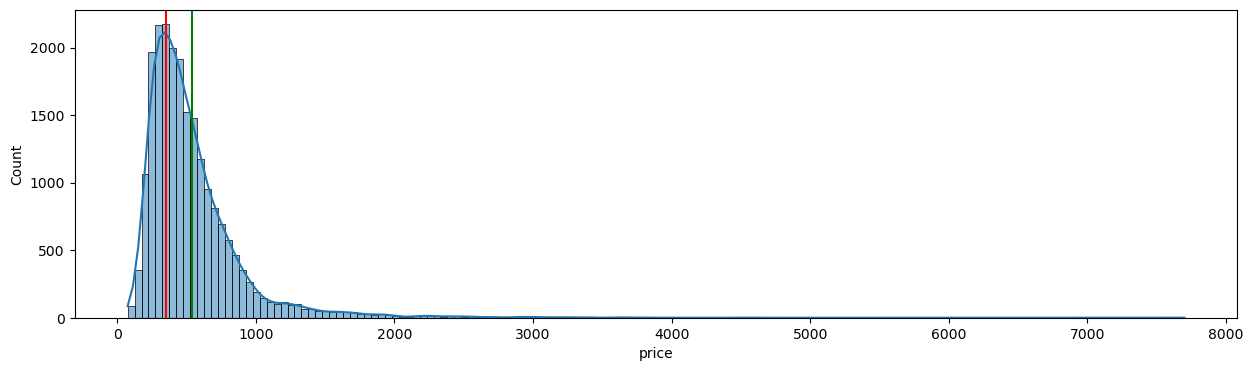

In [37]:
plt.figure(figsize=(15, 4))
sns.histplot(data=df, x='price', binwidth=50, kde=True)
plt.axvline(x=Mx, color='green')
plt.axvline(x=Mo, color='red');

#### <font color = SteelBlue size = 4> <b>Эксцесс</b> </font>

<u>**Эксцесс**</u> – это степень отклонения эмпирической кривой распределения от теоретической кривой нормального распределения.\
Это количественная мера «горбатости» симметричного распределения, т.е. некоторой выпуклости или пологости.

$\displaystyle E_k = \frac{m_4}{\sigma^{4}_{e}}$, где \
$m_4$ – центральный эмпирический момент четвертого порядка: $m_4 = \cfrac{\sum^{n}_{i=1}{(x_i-\bar{x})^4}}{n}$

Эксцесс оказывается полезным при поиске тяжёлых хвостов. \
Большое значение эксцесса сигнализирует о наличии тяжёлых хвостов и выбросов в данных.

In [38]:
df['price'].kurtosis()

34.58554043194243

### <font color = MediumBlue size = 5> <b>Квантили распределения</b> </font>

Одним из наиболее действенных методов описания выборки является описание с помощью квантилей и процентилей.

**<u>Квантиль</u> $Q$** – это значение, отделяющее от распределения слева или справа определенную долю объема совокупности.

**<u>Квартили</u> $Q_1,Q_2,Q_3$** – это три точки (значения признака), которые делят упорядоченное множество данных на четыре части. \
Первый квартиль ($Q_1$),отделяет слева 25% объема совокупности. Второй квартиль ($Q_2$),делит совокупность на две равные по объему части (по 50%),он называется медианой. Третий квартиль ($Q_3$) отделяет слева 75% объема совокупности или справа 25% объема.

**<u>Децили</u> $D_1,D_2,\ldots,Q_9$** – это варианты, которые делят упорядоченный вариационный ряд на 10 равных (по количеству вариант) частей.

**<u>Процентили</u> $Р_1,P_2,\ldots,P_{99}$** – это точки (их 99) которые делят упорядоченное множество данных на 100 частей.

Считается, что $n$-й процентиль – это такое значение, ниже которого расположено $n$ процентов наблюдений данной переменной. Следовательно, 40-й процентиль – это значение, ниже которого расположено 40% результатов наблюдений; 50-й процентиль называется медианой, а 25-й и 75-й процентили – нижним и верхним квантилям соответственно.

Квантили и процентили используются для определения частоты встречаемости тех или иных значений (или интервалов) измеренного признака или для выделения подгрупп и отдельных испытуемых, наиболее типичных или нетипичных для данного множества наблюдений. Через квартили так же могут определяться числовые характеристики положения, рассеяния и асимметрии.

После разбиения вариационного ряда каждый участок исследуется по отдельности – рассчитываются локальные средние показатели, локальные показатели вариации и т.д.

In [39]:
np.quantile(df['price'], [0.05, 0.25, 0.5, 0.75, 0.95])

array([ 210.  ,  321.95,  450.  ,  645.  , 1156.48])

In [40]:
np.percentile(df['price'], [5, 25, 50, 75, 95])

array([ 210.  ,  321.95,  450.  ,  645.  , 1156.48])

In [41]:
df['price'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     210.00
0.25     321.95
0.50     450.00
0.75     645.00
0.95    1156.48
Name: price, dtype: float64

In [42]:
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
data = pd.DataFrame(df['price'].quantile(quantiles))
data.index = [f'{p * 100}%' for p in quantiles]
data.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
price,210.0,321.95,450.0,645.0,1156.48


**Квантиль уровня $\gamma$** – это такое число $q$, при котором $P(X \leq q) = \gamma$.

In [43]:
q = np.quantile(df['price'], 0.25)
q

321.95

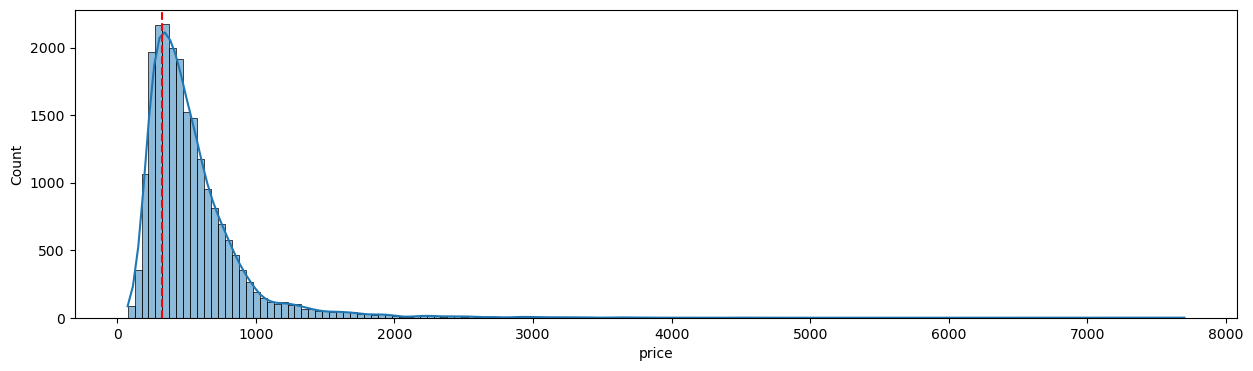

In [44]:
fig, ax = plt.subplots(figsize=(15, 4))

sns.histplot(data=df, x='price', binwidth=50, kde=True)
ax.axvline(q, color='red', linestyle="--", lw=1.5);

### <font color = MediumBlue size = 5> <b>Ящик с усами (boxplot)</b> </font>

По ящику с усами можно узнать медиану распределения (жирная линия в центре).\
1 квартиль распределения (квантиль уровня 0.25), 3 квартиль распределения (квантиль уровня 0.75), интер-квартильный размах.\
Еще можно судить об ассиметрии выборки по смещению медианы относительно центра интер-квартильного размаха.\
Усы графика означают "нормальное" расстояние или еще это расстояние называют данными без выбросов. В диапазоне "нормального" расстояния лежит 99,3% всех измерений, остальные 0,7% принято считать выбросами. То есть это те значения которые очень сильно отклоняются вверх или вниз. Точками на таком графике отображаются выбросы.

<u>**Интер-квартильный размах**</u> (IQR) – "расстояние" или разница между 3 и 1 квартилем (25-м и 75-м процентилями). По этому показателю можно судить насколько сильно разбросана выборка. В пределах интер-квартильного размаха лежит 50% всех наблюдений.

<img src="./img/st_02_image1.png" width="700"/>

**Правило 1.5 интерквантильных размахов (IQR):**\
если наблюдение оказались за пределами выделенного интервала, оно выброс.\
Иногда используют 3 IQR.

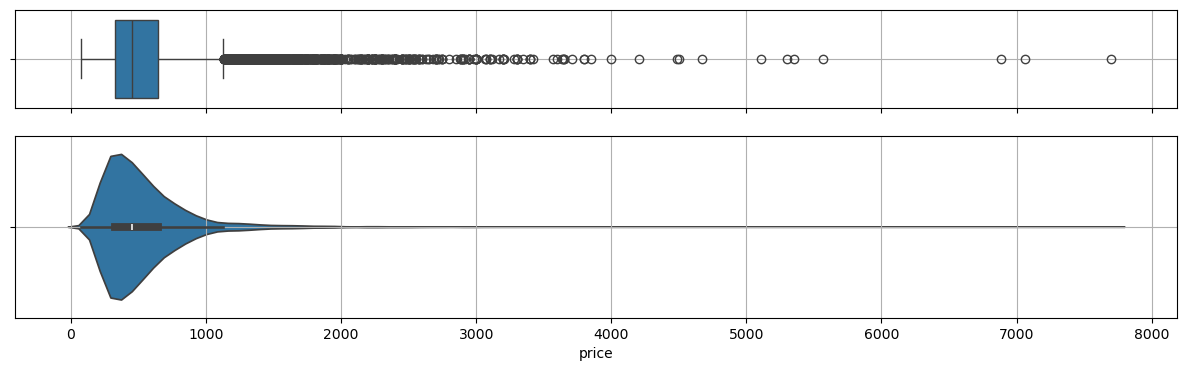

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(15, 4), sharex=True, gridspec_kw = {'height_ratios': (.35, .65)})

sns.boxplot(data=df, x='price', ax=axs[0])
sns.violinplot(data=df, x='price', ax=axs[1])
for ax in axs:
    ax.grid();

Несколько примеров распределений, на которых точки перетекают из одной области в другую, но при этом форма ящика с усами никак не меняется.

![](./img/boxplots.gif)

![](./img/BoxViolinSmaller.gif)

1. **Плотность распределения** (*распределение признака, хвосты слева и справа*):
    - plt.hist
    - sns.displot
    - sns.kdeplot

<br>

2. **Ящик с усами** (*диапазон значений, выбросы*):
	- plt.boxplot
	- sns.boxplot
	- sns.violinplot

<br>

3. **Столбчатая диаграмма** (*распределение категориального признака*):
	- plt.bar
	- sns.barplot

<br>

4. **Доля объектов** от всего кол-ва:
	- plt.pie

<br>

5. **Взаимное изменение признаков**:
	- sns.jointplot
	- sns.regplot
    - sns.pairplot

In [ ]:
# df.columns

In [46]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,weight
count,2.161300e+04,21613,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.205135
min,1.000102e+06,2014-05-02 00:00:00,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.076923
25%,2.123049e+09,2014-07-22 00:00:00,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.090909
50%,3.904930e+09,2014-10-16 00:00:00,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.125000
75%,7.308900e+09,2015-02-17 00:00:00,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.250000
max,9.900000e+09,2015-05-27 00:00:00,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000
std,2.876566e+09,NaN,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.184335


In [47]:
df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [48]:
df.describe(include=['datetime'])

,date
count,21613
mean,2014-10-29 04:38:01.959931648
min,2014-05-02 00:00:00
25%,2014-07-22 00:00:00
50%,2014-10-16 00:00:00
75%,2015-02-17 00:00:00
max,2015-05-27 00:00:00


In [ ]:
df.describe(include=['object'])